In [1]:
import numpy as np
import pandas as pd

from etl import load_monsters, _mechanics, get_monster_df

# Load data

In [2]:
monsters, ogl = load_monsters()
monster_df = get_monster_df(monsters)

In [3]:
monster_df[_mechanics]

,challenge_rating,armor_class,hit_dice,hit_points,condition_immunities,damage_immunities,damage_resistances,damage_vulnerabilities,actions,reactions,legendary_actions,special_abilities,size,speed,senses
name,,,,,,,,,,,,,,,
Aboleth,10.00,17,18d10,135,,,,,"[{'name': 'Multiattack', 'desc': 'The aboleth ...",[],"[{'name': 'Detect', 'desc': 'The aboleth makes...","[{'name': 'Amphibious', 'desc': 'The aboleth c...",Large,"10 ft., swim 40 ft.","darkvision 120 ft., passive Perception 20"
Acolyte,0.25,10,2d8,9,,,,,"[{'name': 'Club', 'desc': 'Melee Weapon Attack...",[],[],"[{'name': 'Spellcasting', 'desc': 'The acolyte...",Medium,30 ft.,passive Perception 12
Adult Black Dragon,14.00,19,17d12,195,,acid,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Amphibious', 'desc': 'The dragon ca...",Huge,"40 ft., fly 80 ft., swim 40 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Blue Dracolich,17.00,19,18d12,225,"charmed, exhaustion, frightened, paralyzed, po...","lightning, poison",necrotic,,"[{'name': 'Multiattack', 'desc': 'The dracolic...",[],"[{'name': 'Detect', 'desc': 'The dracolich mak...","[{'name': 'Legendary Resistance (3/Day)', 'des...",Huge,"40 ft., burrow 30 ft., fly 80 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Blue Dragon,16.00,19,18d12,225,,lightning,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Legendary Resistance (3/Day)', 'des...",Huge,"40 ft., burrow 30 ft., fly 80 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Brass Dragon,13.00,18,15d12,172,,fire,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],[],"[{'name': 'Legendary Resistance (3/Day)', 'des...",Huge,"40 ft., burrow 40 ft., fly 80 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Bronze Dragon,15.00,19,17d12,212,,lightning,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Amphibious', 'desc': 'The dragon ca...",Huge,"40 ft., fly 80 ft., swim 40 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Copper Dragon,14.00,18,16d12,184,,acid,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Legendary Resistance (3/Day)', 'des...",Huge,"40 ft., climb 40 ft., fly 80 ft.","blindsight 60 ft., darkvision 120 ft., passive..."
Adult Gold Dragon,17.00,19,19d12,256,,fire,,,"[{'name': 'Multiattack', 'desc': 'The dragon c...",[],"[{'name': 'Detect', 'desc': 'The dragon makes ...","[{'name': 'Amphibious', 'desc': 'The dragon ca...",Huge,"40 ft., fly 80 ft., swim 40 ft.","blindsight 60 ft., darkvision 120 ft., passive..."


# Visualizations

In [4]:
from plotnine import aes, geom_boxplot, geom_point, ggplot, theme_bw

/Users/jason/Code/cr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


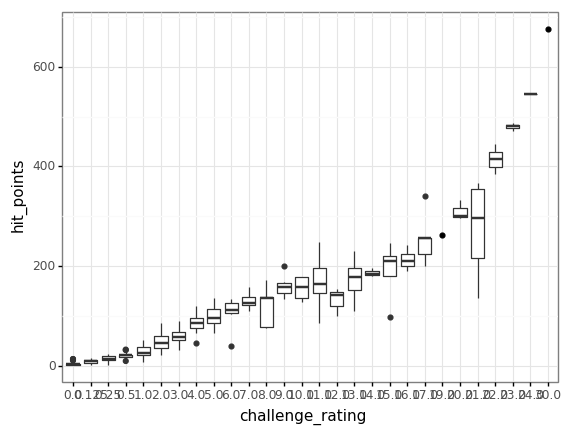

<ggplot: (-9223372036576715453)>

In [5]:
df = pd.DataFrame.copy(monster_df[['challenge_rating', 'hit_points', 'armor_class']])
df.challenge_rating= df.challenge_rating.astype('category')

# due to a matplotlib bug, plotnine doesn't handle categoricals with one datapoint gracefully
counts = df.challenge_rating.groupby(df.challenge_rating).count().rename('count')
singletons = [x for x in counts.index[counts == 1]]
a = df[df.challenge_rating.apply(lambda x: x not in singletons)]
b = df[df.challenge_rating.apply(lambda x: x in singletons)]

ggplot(a, aes(x='challenge_rating', y='hit_points')) + geom_boxplot() \
    + geom_point(b, aes(x='challenge_rating', y='hit_points')) + theme_bw()

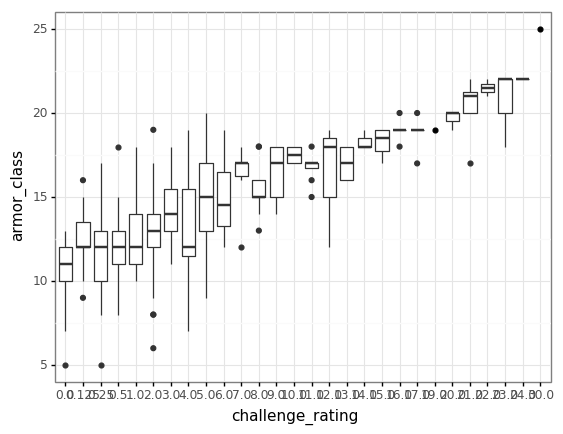

<ggplot: (278237090)>

In [6]:
ggplot(a, aes(x='challenge_rating', y='armor_class')) + geom_boxplot() \
    + geom_point(b, aes(x='challenge_rating', y='armor_class')) + theme_bw()

# Feature extraction

Need to use some intelligence in extracting keywords.

In [7]:
from functools import reduce
actions_keys = {tuple(action.keys()) for actions in monster_df.actions for action in actions}
actions_keys

{('name', 'desc', 'attack_bonus'),
 ('name', 'desc', 'attack_bonus', 'damage_bonus'),
 ('name', 'desc', 'attack_bonus', 'damage_dice'),
 ('name', 'desc', 'attack_bonus', 'damage_dice', 'damage_bonus')}

In [8]:
monster_df.actions[monster_df.actions.apply(lambda x: any('damage_bonus' in y and 'damage_dice' not in y for y in x))]

name
Badger             [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Bat                [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Cat                [{'name': 'Claws', 'desc': 'Melee Weapon Attac...
Crab               [{'name': 'Claw', 'desc': 'Melee Weapon Attack...
Flying Snake       [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Hawk               [{'name': 'Talons', 'desc': 'Melee Weapon Atta...
Homunculus         [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Lizard             [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Octopus            [{'name': 'Tentacles', 'desc': 'Melee Weapon A...
Owl                [{'name': 'Talons', 'desc': 'Melee Weapon Atta...
Poisonous Snake    [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Quipper            [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Rat                [{'name': 'Bite', 'desc': 'Melee Weapon Attack...
Scorpion           [{'name': 'Sting', 'desc': 'Melee Weapon Attac...
Spider             [{'name': 

In [9]:
monster_df.actions['Rat']

[{'attack_bonus': 0,
  'damage_bonus': 1,
  'desc': 'Melee Weapon Attack: +0 to hit, reach 5 ft., one target. Hit: 1 piercing damage.',
  'name': 'Bite'}]

In [10]:
from collections import namedtuple
import re

pattern = re.compile(r'\bDC (\d+) (Strength|Dexterity|Constitution|Intelligence|Wisdom|Charisma)\b')
def get_dc(text):
    g = re.search(pattern, text)
    if g:
        return g.groups()
    return []

def parse_actions(actions):
    multi = False
    for action in actions:
        if action['name'] == 'Multiattack':
            multi = True
            continue
        attack_bonus = action.get('attack_bonus', 0)
        damage_bonus = action.get('damage_bonus', 0)
        damage_dice = action.get('damage_dice', '')
        dcs = get_dc(action.get('desc'))
    return multi, attack_bonus, damage_bonus, damage_dice, dcs

In [11]:
get_dc(monster_df.actions[0][3]['desc'])

('14', 'Wisdom')

In [12]:
monster_df.reactions[monster_df['reactions'].apply(lambda x: len(x) > 0)]

name
Bandit Captain     [{'name': 'Parry', 'desc': 'The captain adds 2...
Black Pudding      [{'name': 'Split', 'desc': 'When a pudding tha...
Chain Devil        [{'name': 'Unnerving Mask', 'desc': 'When a cr...
Erinyes            [{'name': 'Parry', 'desc': 'The erinyes adds 4...
Gladiator          [{'name': 'Parry', 'desc': 'The gladiator adds...
Knight             [{'name': 'Parry', 'desc': 'The knight adds 2 ...
Marilith           [{'name': 'Parry', 'desc': 'The marilith adds ...
Noble              [{'name': 'Parry', 'desc': 'The noble adds 2 t...
Ochre Jelly        [{'name': 'Split', 'desc': 'When a jelly that ...
Shield Guardian    [{'name': 'Shield', 'desc': 'When a creature m...
Stone Giant        [{'name': 'Rock Catching', 'desc': 'If a rock ...
Name: reactions, dtype: object

In [13]:
from functools import partial, reduce

def string_to_list(x, sep=','):
    return [y.strip() for y in x.split(sep)]


def concat(lists):
    return reduce(lambda x, y: x + y, lists, [])


def get_unique_values(series, sep=','):
    lists = series.apply(partial(string_to_list, sep=sep))
    values = concat(lists)
    return sorted(v for v in set(values) if v)

In [14]:
condition_immunities = get_unique_values(monster_df.condition_immunities)
damage_immunities = get_unique_values(monster_df.damage_immunities, sep=';')
damage_resistances = get_unique_values(monster_df.damage_resistances, sep=';')
damage_vulnerabilities = get_unique_values(monster_df.damage_vulnerabilities)